In [69]:
import os
import glob
import ast
import json
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

In [ ]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"
metric_name = "median"

pos_hits_data = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/hits_{mode}_{a}_{b}.csv")
pos_consistency_score = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/consistency_{mode}_{a}_{b}.csv")
pos_final_df = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/hits_summary_genrewise_{mode}_{a}_{b}.csv")      # hits summary genre wise          
pos_consistency_score_genrewise = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/consistency_genrewise_{mode}_{a}_{b}.csv") # consistency score genre wise    

vel_hits_data = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/hits_{mode}_{a}_{b}.csv")
vel_consistency_score = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/consistency_{mode}_{a}_{b}.csv")
vel_final_df = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/hits_summary_genrewise_{mode}_{a}_{b}.csv")      # hits summary genre wise          
vel_consistency_score_genrewise = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/consistency_genrewise_{mode}_{a}_{b}.csv") # consistency score genre wise  

posvel_hits_data = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/hits_{mode}_{a}_{b}.csv")
posvel_consistency_score = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/consistency_{mode}_{a}_{b}.csv")
posvel_final_df = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/hits_summary_genrewise_{mode}_{a}_{b}.csv")      # hits summary genre wise          
posvel_consistency_score_genrewise = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/{metric_name}/consistency_genrewise_{mode}_{a}_{b}.csv") # consistency score genre wise  
               

#### Overall Tempo Accuracy

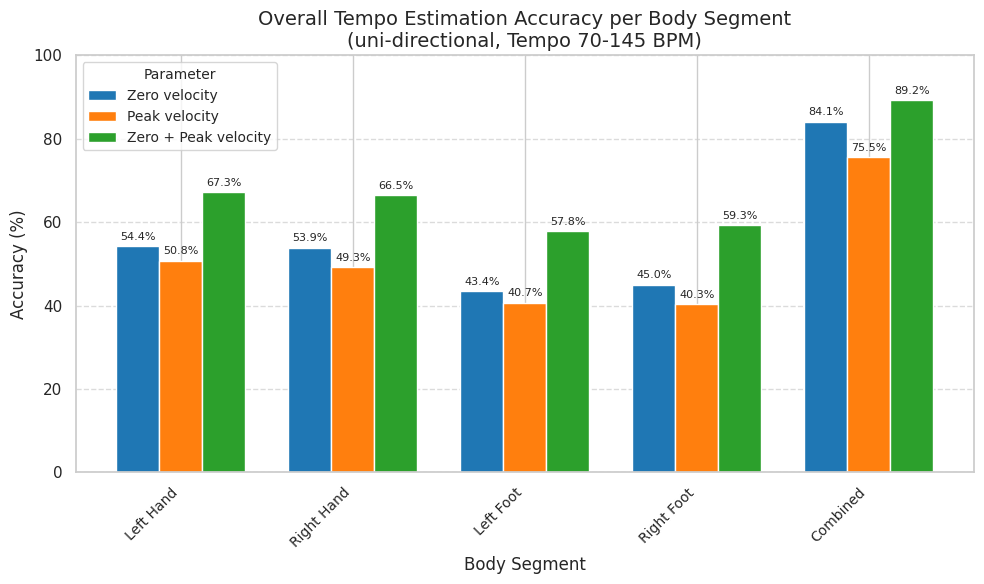

In [71]:
# Grouped bar plot
pos_df = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
vel_df = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
posvel_df = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")

# Plot parameters
x = np.arange(len(pos_df["segment"]))  # Segment indices
width = 0.25  # Width of the bars (adjusted for three groups)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, pos_df["hits_percentage"], width, label='Zero velocity', color='#1f77b4')
bars2 = ax.bar(x, vel_df["hits_percentage"], width, label='Peak velocity', color='#ff7f0e')
bars3 = ax.bar(x + width, posvel_df["hits_percentage"], width, label='Zero + Peak velocity', color='#2ca02c')

# Add text labels on top of each bar
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=8)

# Plot aesthetics
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_xlabel('Body Segment', fontsize=12)
ax.set_title(f'Overall Tempo Estimation Accuracy per Body Segment\n({mode}-directional, Tempo {a}-{b} BPM)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pos_df["segment"], rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Parameter", fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()


#### Tempo Estimation Accuracy by Genre

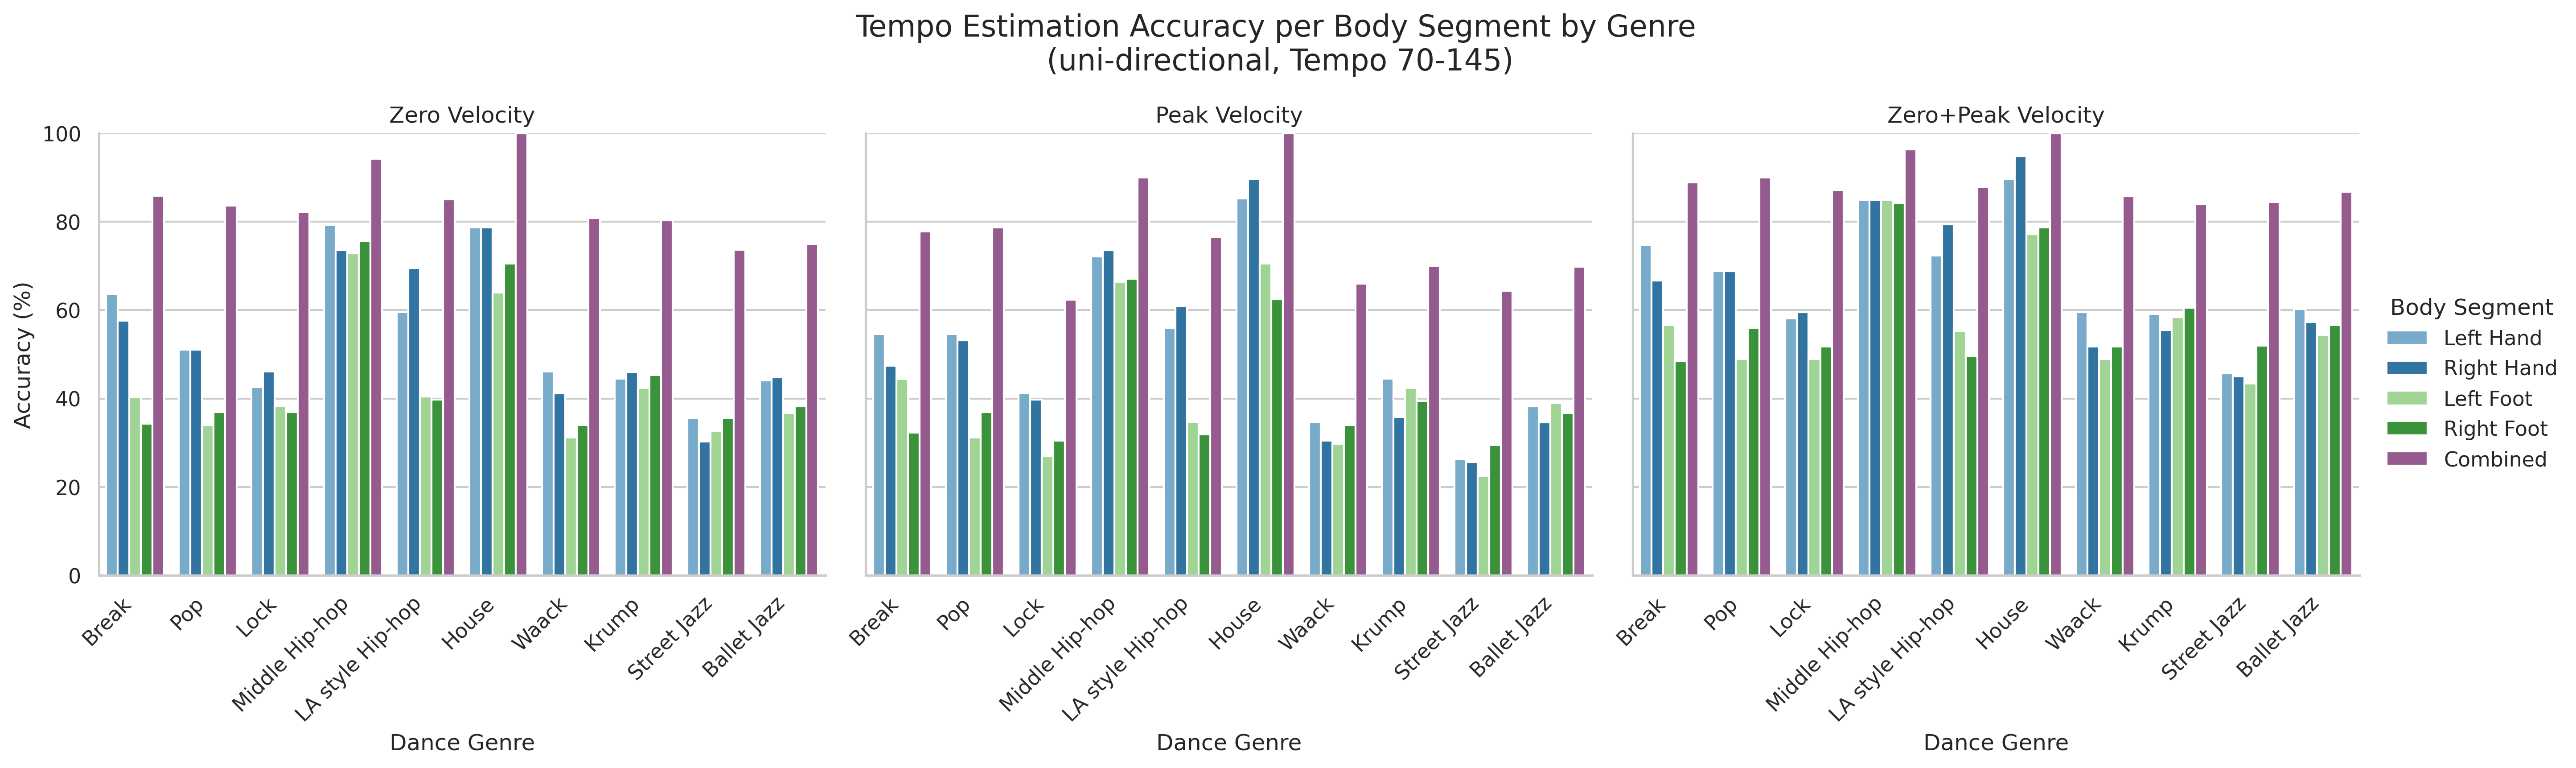

In [72]:
def melt_df(df, metric_label):
    melted = df.melt(
        id_vars=["genre"],
        value_vars=["left_hand_percentage", "right_hand_percentage", "left_foot_percentage", "right_foot_percentage", "Combined_percentage"],
        var_name="Segment",
        value_name="Accuracy"
    )
    # Mapping for cleaner labels
    segment_map = {
        "left_hand_percentage": "Left Hand",
        "right_hand_percentage": "Right Hand",
        "left_foot_percentage": "Left Foot",
        "right_foot_percentage": "Right Foot",
        "Combined_percentage": "Combined"
    }
    melted["Segment"] = melted["Segment"].map(segment_map)
    melted["Metric"] = metric_label
    return melted


# 📊 Combine all metrics
pos_melt = melt_df(pos_final_df, "Zero Velocity")
vel_melt = melt_df(vel_final_df, "Peak Velocity")
posvel_melt = melt_df(posvel_final_df, "Zero+Peak Velocity")

combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

palette = {
    "Left Hand": "#6baed6",   # Light Blue (Left Hand)
    "Right Hand": "#1f77b4",  # Dark Blue (Right Hand)
    "Left Foot": "#98df8a",   # Light Green (Left Foot)
    "Right Foot": "#2ca02c",  # Dark Green (Right Foot)
    "Combined": "#a05195"     # Purple (Combined)
}

# Faceted grouped vertical bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Accuracy", hue="Segment",
    col="Metric",  # Facet by metric
    palette=palette,
    height=5, aspect=1.2,
    legend_out=True
)

g.fig.set_dpi(300)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
g._legend.set_title("Body Segment")

# 🔖 Add percentage labels on top of bars
# for ax in g.axes.flat:
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Tempo Estimation Accuracy per Body Segment by Genre\n ({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Inter limb tempo consistency score

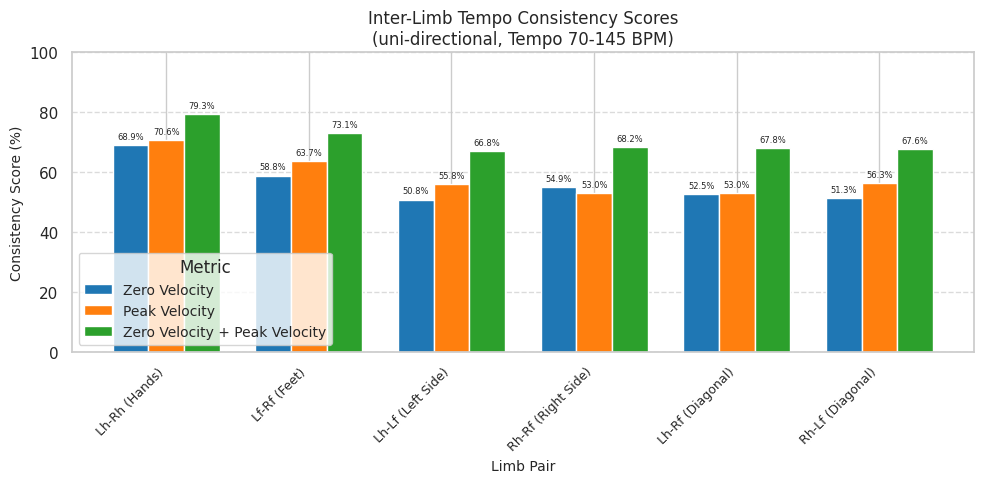

In [73]:

# Combine all three datasets into a single DataFrame
combined_df = pd.DataFrame({
    "Pair": pos_consistency_score["Pair"],
    "Position": pos_consistency_score["Consistency Score"],
    "Velocity": vel_consistency_score["Consistency Score"],
    "PosVel": posvel_consistency_score["Consistency Score"]
})

# Create grouped bar plot
x = np.arange(len(combined_df["Pair"]))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(x - width, combined_df["Position"], width, label="Zero Velocity", color="#1f77b4")
bars2 = ax.bar(x, combined_df["Velocity"], width, label="Peak Velocity", color="#ff7f0e")
bars3 = ax.bar(x + width, combined_df["PosVel"], width, label="Zero Velocity + Peak Velocity", color="#2ca02c")

# Formatting the plot
ax.set_xlabel("Limb Pair", fontsize=10)
ax.set_ylabel("Consistency Score (%)", fontsize=10)
ax.set_title(f"Inter-Limb Tempo Consistency Scores\n({mode}-directional, Tempo {a}-{b} BPM)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(combined_df["Pair"], rotation=45, ha="right", fontsize=9)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Metric", fontsize=10, loc= 'lower left')

# Adding percentage labels on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=6)

plt.tight_layout()
plt.show()


#### Hand & Foot tempo consistency score by genre

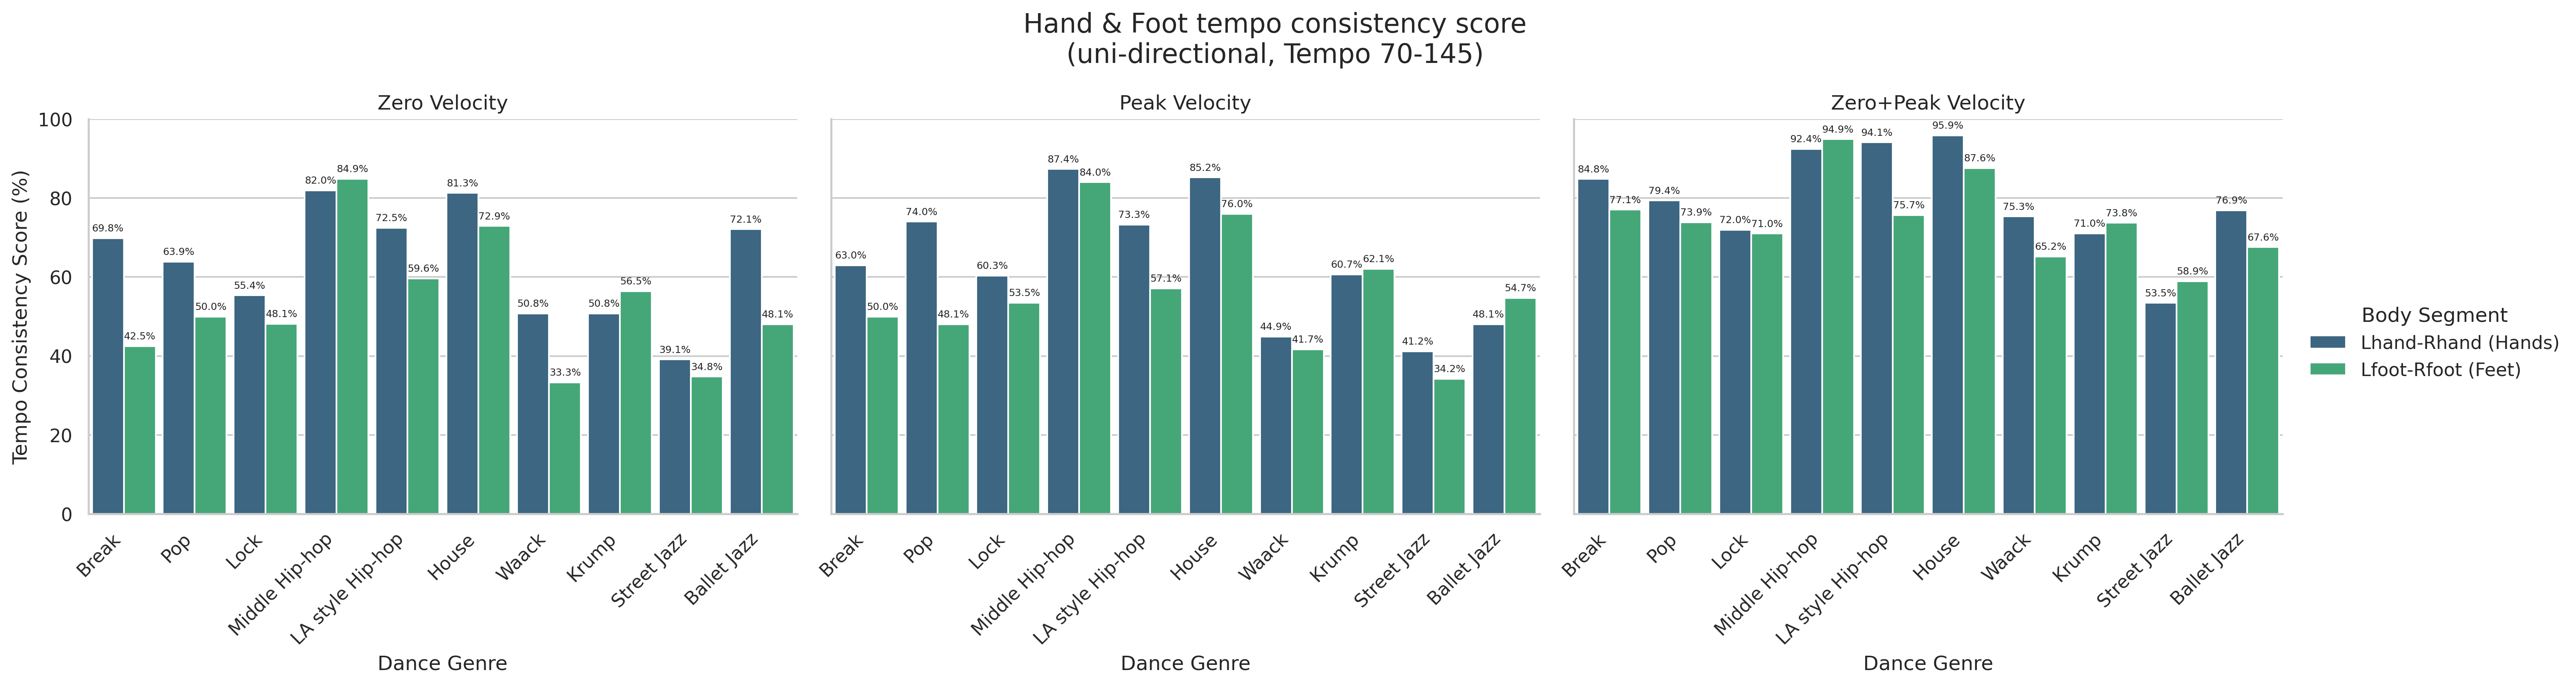

In [74]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Rhand (Hands)", "Lfoot-Rfoot (Feet)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(pos_consistency_score_genrewise, "Zero Velocity")
vel_melt = melt_df(vel_consistency_score_genrewise, "Peak Velocity")
posvel_melt = melt_df(posvel_consistency_score_genrewise, "Zero+Peak Velocity")

combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,

)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Hand & Foot tempo consistency score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Left Side & Right Side Tempo Consistency Score

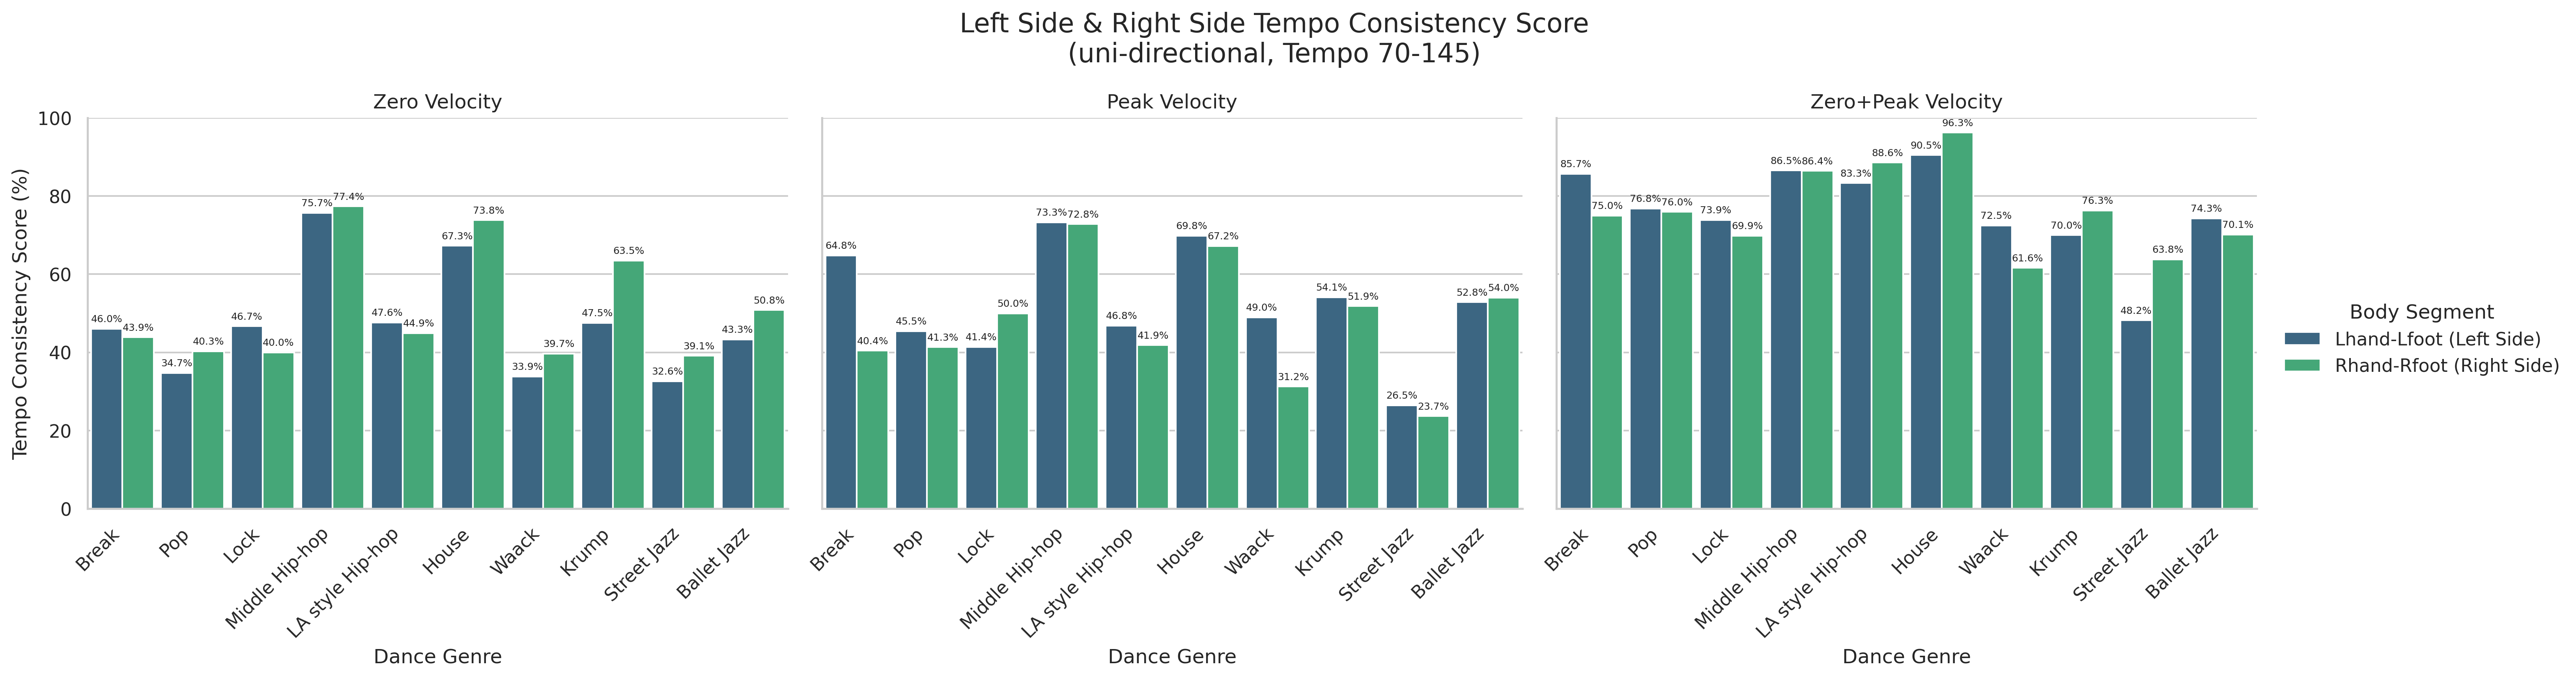

In [75]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Lfoot (Left Side)", "Rhand-Rfoot (Right Side)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(pos_consistency_score_genrewise, "Zero Velocity")
vel_melt = melt_df(vel_consistency_score_genrewise, "Peak Velocity")
posvel_melt = melt_df(posvel_consistency_score_genrewise, "Zero+Peak Velocity")

side_combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=side_combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,

)

g.fig.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Left Side & Right Side Tempo Consistency Score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Diagonal Tempo Consistency Score

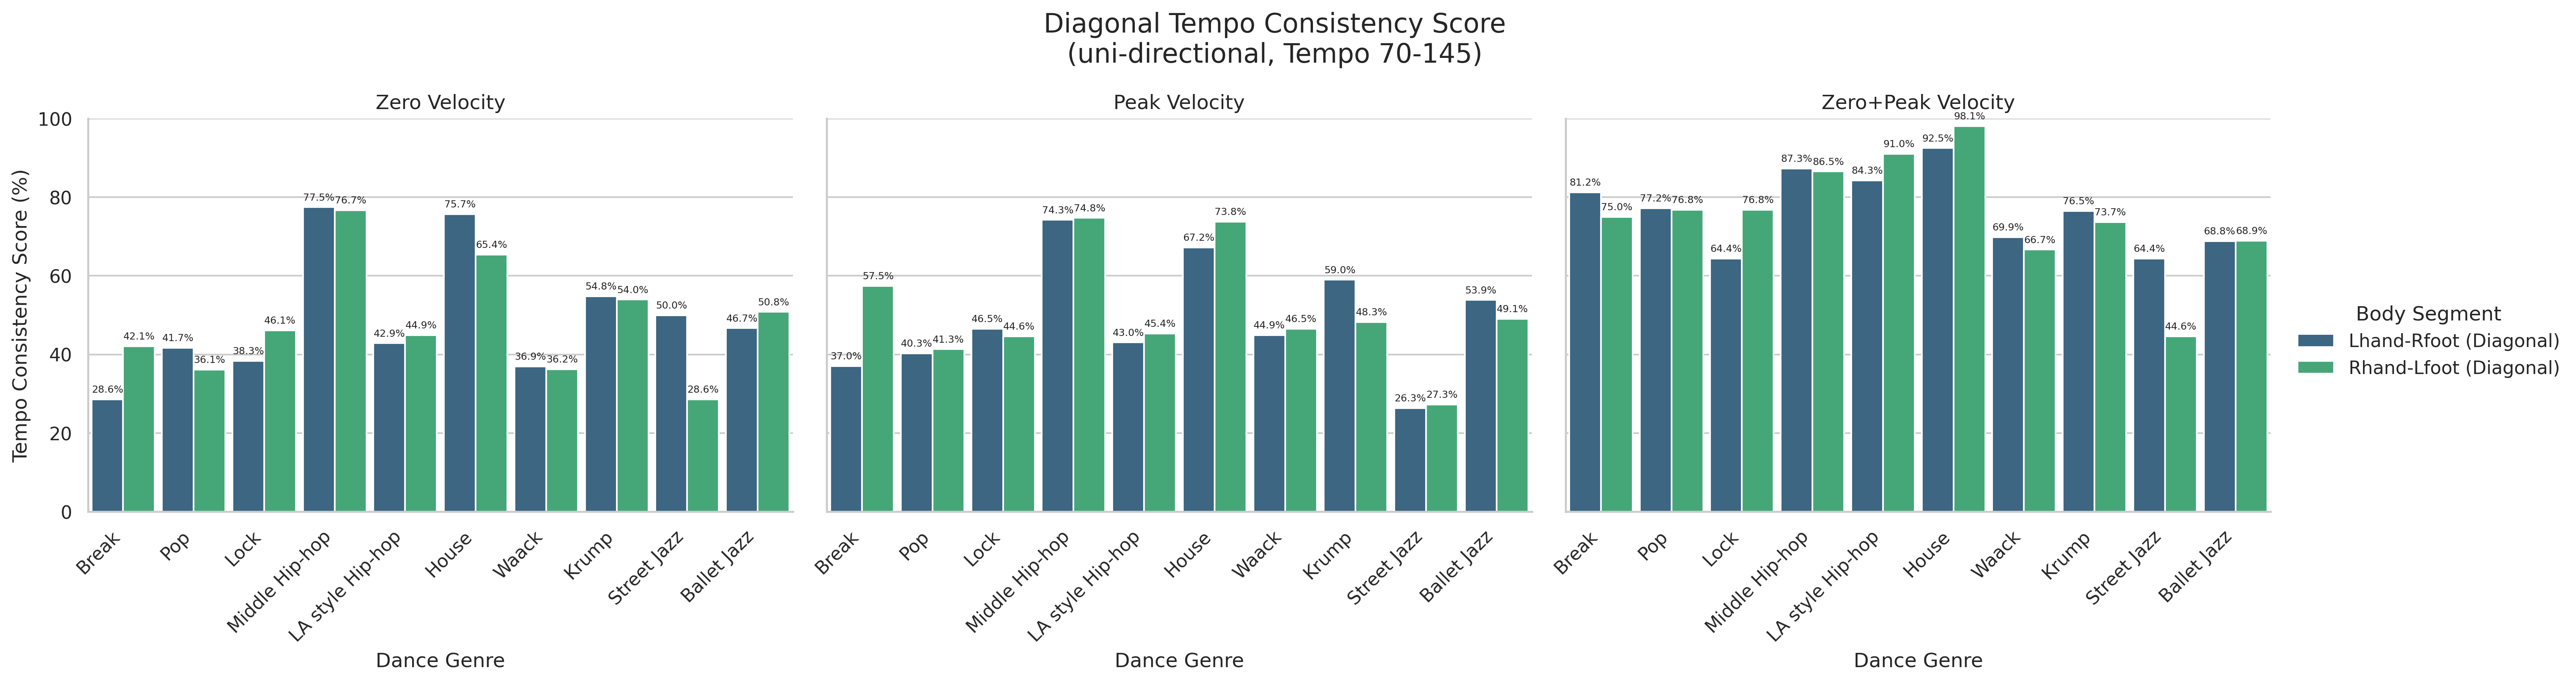

In [76]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Rfoot (Diagonal)", "Rhand-Lfoot (Diagonal)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(pos_consistency_score_genrewise, "Zero Velocity")
vel_melt = melt_df(vel_consistency_score_genrewise, "Peak Velocity")
posvel_melt = melt_df(posvel_consistency_score_genrewise, "Zero+Peak Velocity")

diagonal_combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=diagonal_combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,
)

g.fig.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Diagonal Tempo Consistency Score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Box Plot

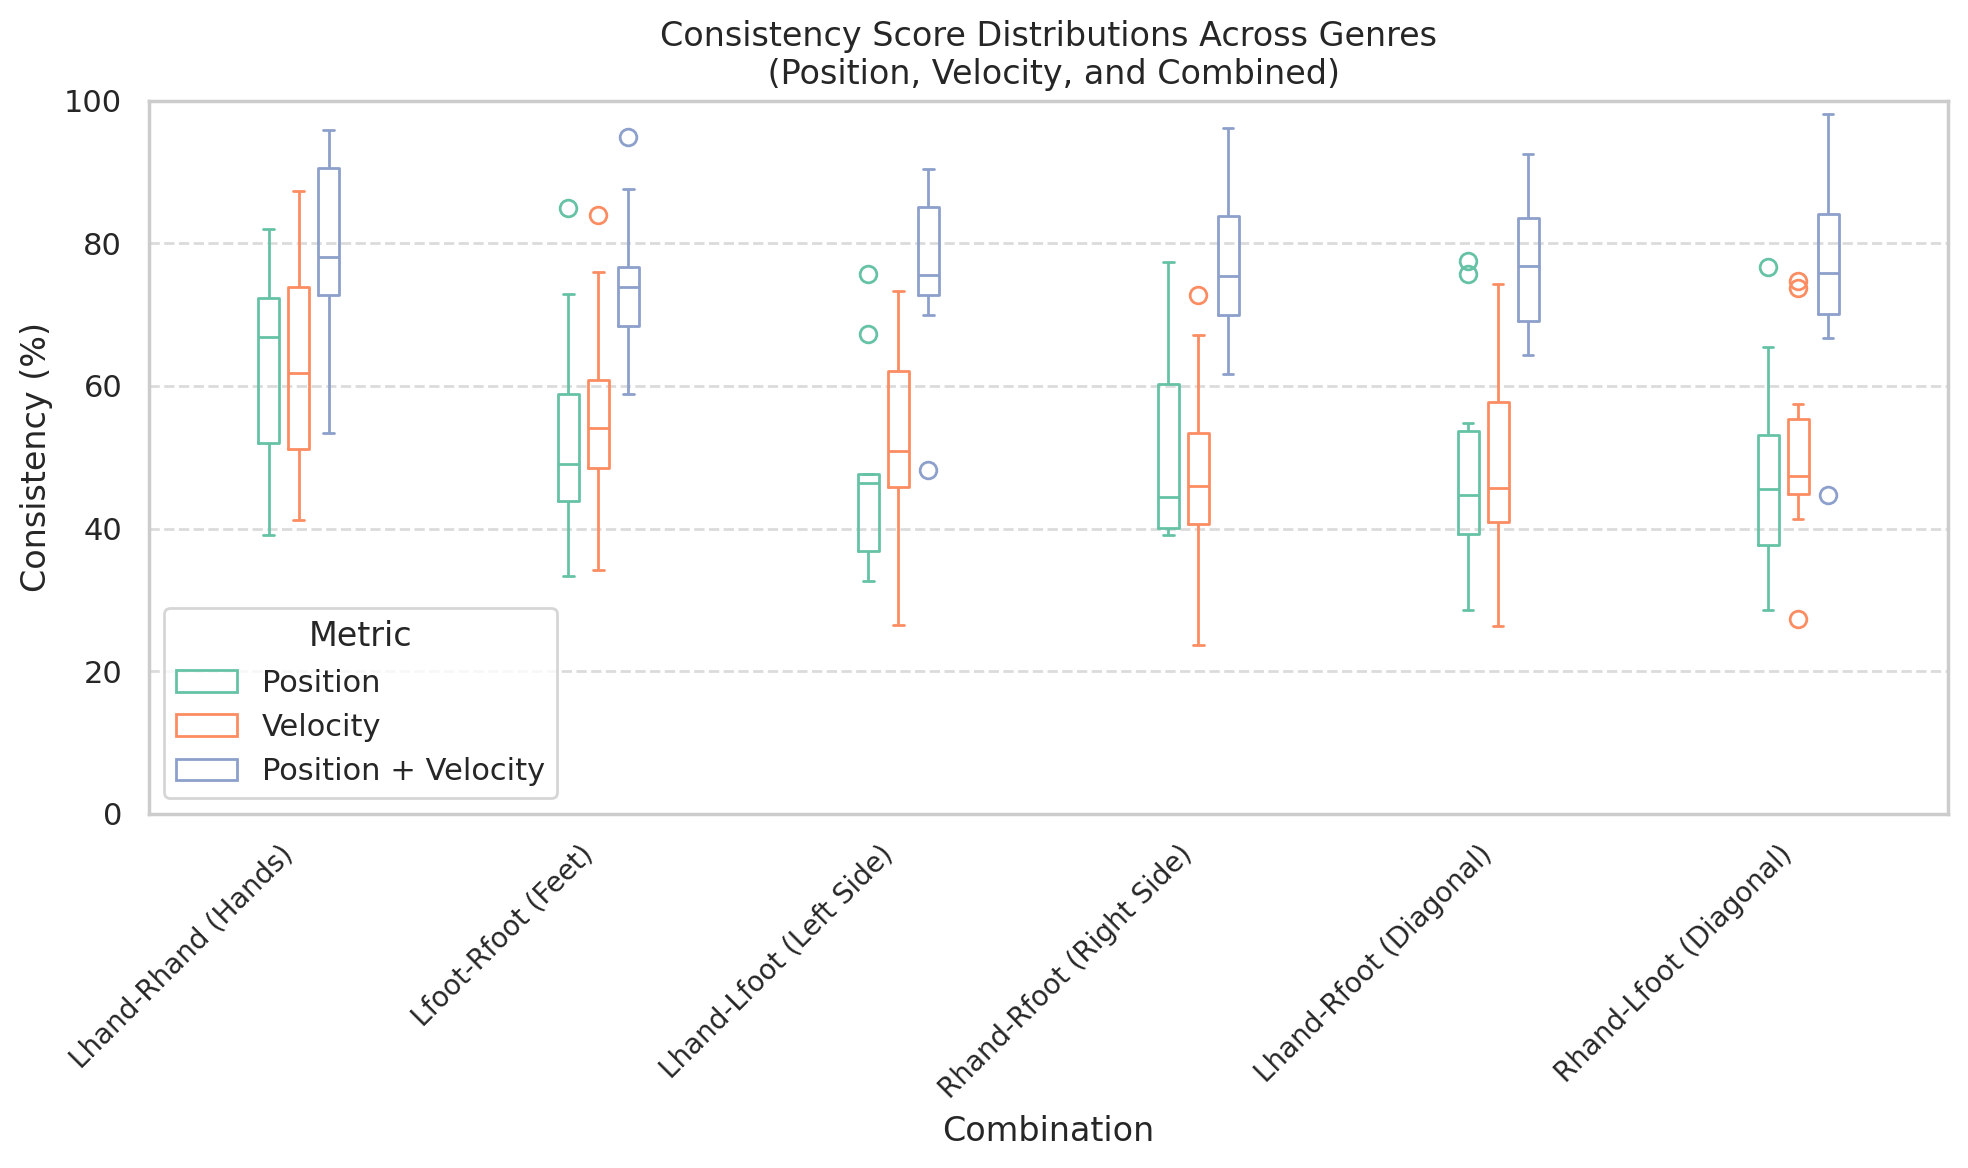

In [93]:


combination = [
    "Lhand-Rhand (Hands)",
    "Lfoot-Rfoot (Feet)",
    "Lhand-Lfoot (Left Side)",
    "Rhand-Rfoot (Right Side)",
    "Lhand-Rfoot (Diagonal)",
    "Rhand-Lfoot (Diagonal)"
]

# Melt each dataframe for long-form representation
posvel_long = posvel_consistency_score_genrewise.melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
posvel_long["Consistency Type"] = "Position + Velocity"

pos_long = pos_consistency_score_genrewise.melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
pos_long["Consistency Type"] = "Position"

vel_long = vel_consistency_score_genrewise.melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
vel_long["Consistency Type"] = "Velocity"

# Combine all long-form dataframes
combined_long = pd.concat([pos_long, vel_long, posvel_long,])

# Create the grouped boxplot
plt.figure(figsize=(10, 6), dpi=200)
sns.boxplot(
    data=combined_long,
    x="Type",
    y="Consistency (%)",
    hue="Consistency Type",  # Grouping by Consistency Type
    palette="Set2",
    width=0.3,
    gap=0.3,
    fill=False,
    linewidth=1
)

# Plot aesthetics
plt.title(f"Consistency Score Distributions Across Genres\n (Position, Velocity, and Combined)")
plt.xlabel("Combination")
plt.ylabel("Consistency (%)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(title="Metric", loc="lower left")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Tempo Estimation Accuracy per Body Segment by Metric

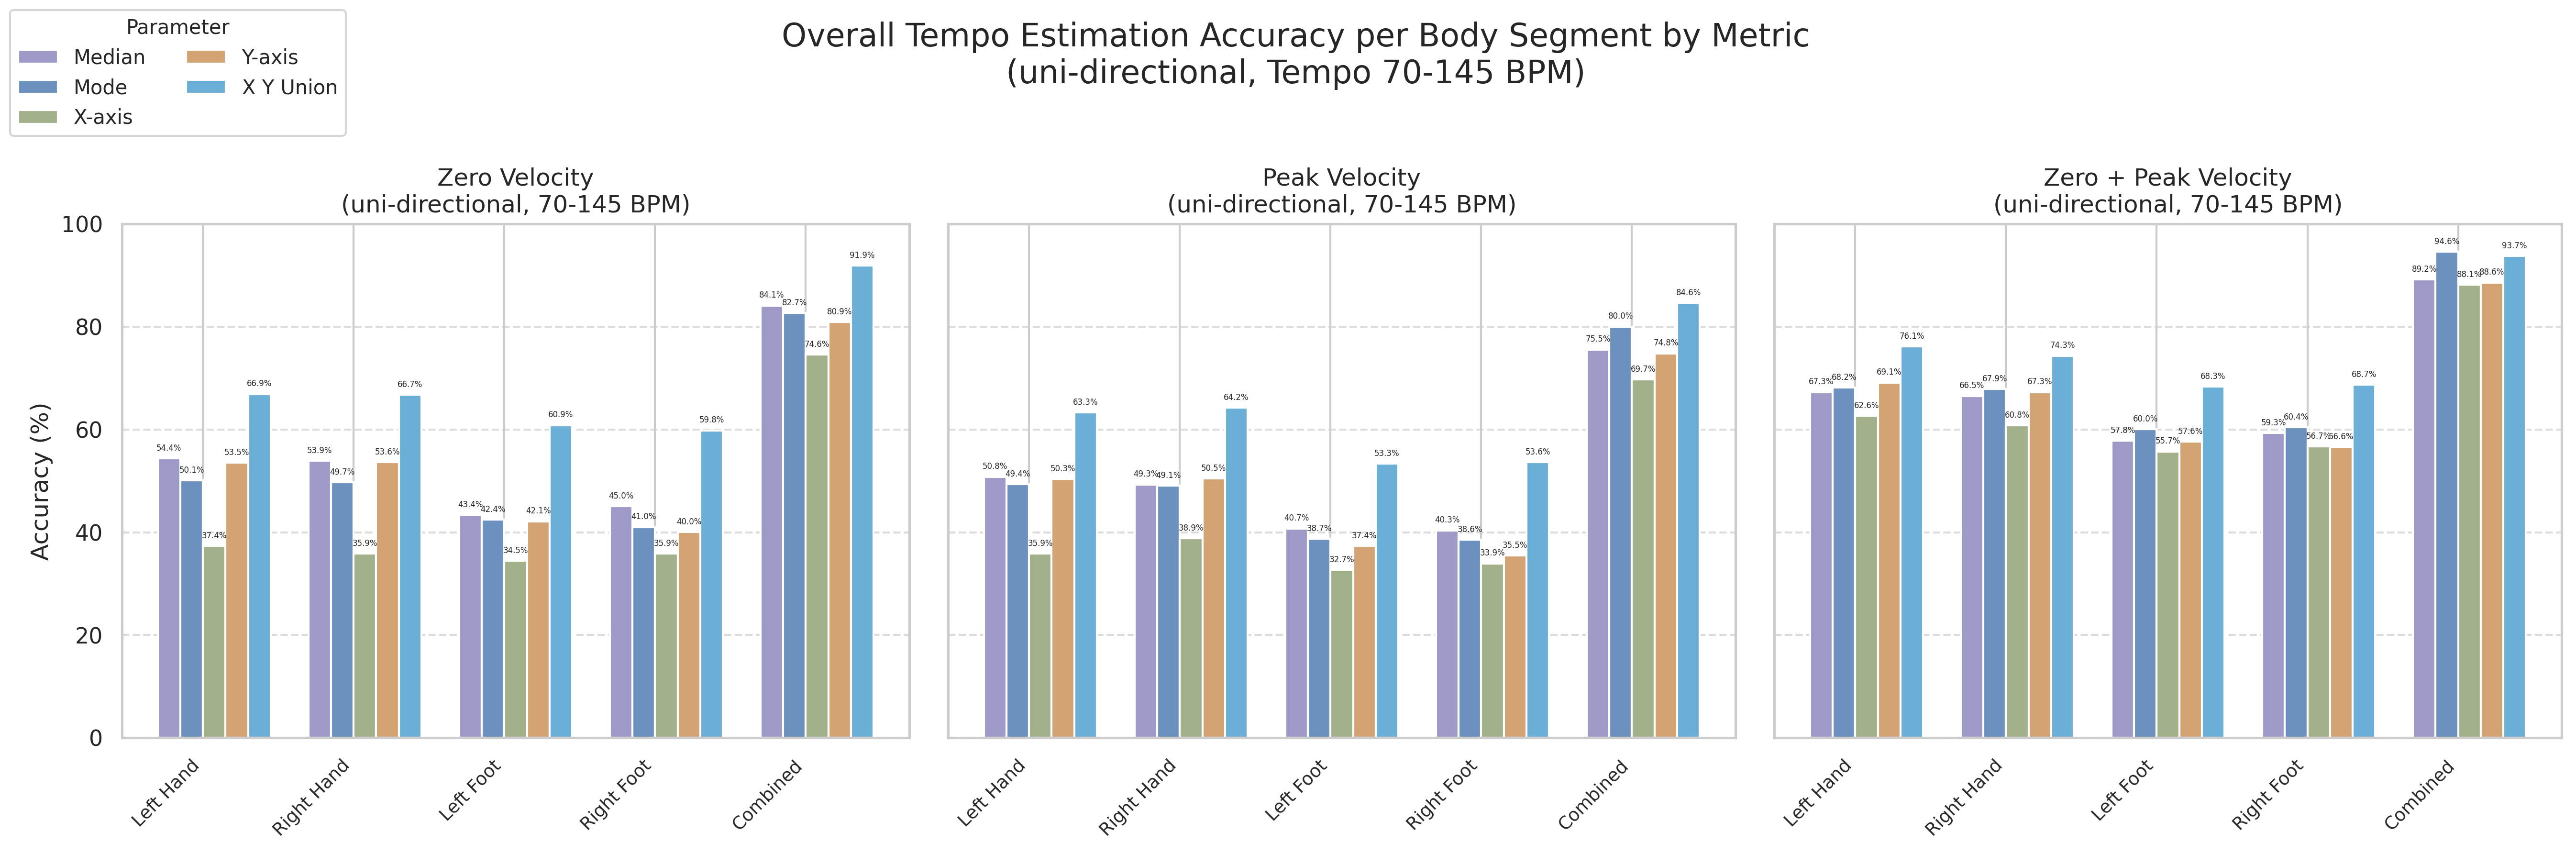

In [188]:
# Parameters
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"
metric_dict = {"pos": "Zero Velocity", "vel": "Peak Velocity", "posvel": "Zero + Peak Velocity"}

# Create subplots: 1 row, 3 columns (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, dpi=300)

# Loop through each metric_dir and plot in its corresponding subplot
for ax, (metric_dir, title_name) in zip(axes, metric_dict.items()):
    # Load data
    posvel_median = pd.read_csv(f"./stats_{metric_dir}/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
    posvel_mode = pd.read_csv(f"./stats_{metric_dir}/{norm_mode}/tempo_{a}_{b}/{mode}/mode/hits_{mode}_{a}_{b}.csv")
    posvel_x = pd.read_csv(f"./stats_{metric_dir}/{norm_mode}/tempo_{a}_{b}/{mode}/x/hits_{mode}_{a}_{b}.csv")
    posvel_y = pd.read_csv(f"./stats_{metric_dir}/{norm_mode}/tempo_{a}_{b}/{mode}/y/hits_{mode}_{a}_{b}.csv")

    # For X and Y union
    posvel_x["hits_idx"] = posvel_x["hits_idx"].apply(ast.literal_eval)   # convert string to list
    posvel_y["hits_idx"] = posvel_y["hits_idx"].apply(ast.literal_eval)
    
    lefth_xy = posvel_x["hits_idx"][0].union(posvel_y["hits_idx"][0])
    righth_xy = posvel_x["hits_idx"][1].union(posvel_y["hits_idx"][1])

    leftf_xy = posvel_x["hits_idx"][2].union(posvel_y["hits_idx"][2])
    rightf_xy = posvel_x["hits_idx"][3].union(posvel_y["hits_idx"][3])

    all_hits_xy = set().union(*[lefth_xy, righth_xy, leftf_xy, rightf_xy])
    xy_dict = {"hits_percentage": [len(lefth_xy)*100/1341, len(righth_xy)*100/1341, len(leftf_xy)*100/1341, len(rightf_xy)*100/1341, len(all_hits_xy)*100/1341,]}
    xy_df = pd.DataFrame(xy_dict)
    # Segment indices
    x = np.arange(len(posvel_median["segment"]))
    width = 0.15

    # Grouped bar plots
    bars1 = ax.bar(x - 1.5 * width, posvel_median["hits_percentage"], width, label='Median', color='#9e9ac8')
    bars2 = ax.bar(x - 0.5 * width, posvel_mode["hits_percentage"], width, label='Mode', color='#6c91bf')
    bars3 = ax.bar(x + 0.5 * width, posvel_x["hits_percentage"], width, label='X-axis', color='#a3b18a')
    bars4 = ax.bar(x + 1.5 * width, posvel_y["hits_percentage"], width, label='Y-axis', color='#d4a373')
    bars5 = ax.bar(x + 2.5 * width, xy_df["hits_percentage"], width, label='X Y Union', color='#6baed6')

    # Add bar labels
    for bars in [bars1, bars2, bars3, bars4, bars5]:
        ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=4)

    # Plot aesthetics
    ax.set_title(f'{title_name}\n({mode}-directional, {a}-{b} BPM)', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(posvel_median["segment"], rotation=45, ha='right', fontsize=9)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)


axes[0].set_ylabel('Accuracy (%)', fontsize=12)

# Single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Parameter", fontsize=10, title_fontsize=10, loc='upper left', ncol=2)

plt.suptitle(f'Overall Tempo Estimation Accuracy per Body Segment by Metric\n({mode}-directional, Tempo {a}-{b} BPM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
